**Data Science Cohort 9, Assessment 2**

**A'aron Chimda Tashkalmah**

*30/Nov/2025*

# The World Happines Report Analysis

**1. Introduction & Context**

The pursuit of happiness is a fundamental human goal. The **World Happiness Report** is a landmark global survey that ranks countries based on how happy their citizens perceive themselves to be. Understanding the drivers of happiness is essential for policymakers, economists, and social scientists.

In this exam, you will step into the role of a **Data Analyst/Scientist** at a global think tank. You have been tasked with analyzing **five years of World Happiness Report data (2015–2019)** to uncover insights into the factors that contribute to national happiness and how these trends evolve over time.

Your mission is to **clean, merge, analyze, and interpret the data**, then present your findings in a comprehensive analytical report.


## The Dataset

You are provided with **five datasets**, one for each year:  
**2015, 2016, 2017, 2018, and 2019.**

Each dataset contains indicators such as:

- Happiness Score and Rank  
- Economy (GDP per Capita)  
- Social Support  
- Healthy Life Expectancy  
- Freedom to Make Life Choices  
- Generosity  
- Perceptions of Corruption  

**Important Note:**  
Column names and structures vary across years.  
- 2015–2017 share similar column names.  
- 2018–2019 use different naming conventions.  
You must carefully examine and standardize them before combining.


## Part A: Data Preparation & Merging

### Loading the Data sets and necessary libraries

In [8]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
yr2015 = r"2015.csv"
yr2016 = r"2016.csv"
yr2017 = r"2017.csv"
yr2018 = r"2018.csv"
yr2019 = r"2019.csv"

### Year 2015

#### A1. Data Loading and Inspection

In [12]:
df_2015 = pd.read_csv(yr2015)

#displaying the first few rows
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
# checking for the shape
df_2015.shape

(158, 12)

In [14]:
# descriptive statistics
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [15]:
# data structure and types
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

- All our columns have the appropriate data types.

#### A2. Data Standardization

##### Step 1: Column Renaming

In [19]:
# using snake case for column renaming
df_2015.columns = (df_2015.columns
                   .str.strip() # remove spaces, we need just the text
                   .str.lower() # convert all characters to lowercase
                   .str.replace(" ", "_") # replace white space with underscore _
                   .str.replace("(","") # remove the opening paranthesis
                   .str.replace(")","")) # remove the closing paranthesis

In [20]:
df_2015.head(6)

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


##### Step 2: Region Handling

Creating a master region lookup using the 2015 data.

In [23]:
# Extract the unique regions

regions_uniq = df_2015['region'].unique()
regions_uniq

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [24]:
# Create a for loop that will itterate the list and return the first 3 letters in uppercase as the region code
region_code = []

for region in regions_uniq:
    code = region[:3].upper()
    region_code.append(code)

In [25]:
region_code

['WES', 'NOR', 'AUS', 'MID', 'LAT', 'SOU', 'CEN', 'EAS', 'SUB', 'SOU']

In [26]:
# create the master region dataframe

master_region = pd.DataFrame()
master_region['region'] = regions_uniq
master_region['region_code'] = region_code
master_region

,region,region_code
0,Western Europe,WES
1,North America,NOR
2,Australia and New Zealand,AUS
3,Middle East and Northern Africa,MID
4,Latin America and Caribbean,LAT
5,Southeastern Asia,SOU
6,Central and Eastern Europe,CEN
7,Eastern Asia,EAS
8,Sub-Saharan Africa,SUB
9,Southern Asia,SOU


In [27]:
# we should group the countries based on their regions
country_groups_2015 = df_2015.groupby('region')['country'].apply(list).to_dict()

In [28]:
country_groups_2015

{'Australia and New Zealand': ['New Zealand', 'Australia'],
 'Central and Eastern Europe': ['Czech Republic',
  'Uzbekistan',
  'Slovakia',
  'Moldova',
  'Kazakhstan',
  'Slovenia',
  'Lithuania',
  'Belarus',
  'Poland',
  'Croatia',
  'Russia',
  'Kosovo',
  'Turkmenistan',
  'Estonia',
  'Kyrgyzstan',
  'Azerbaijan',
  'Montenegro',
  'Romania',
  'Serbia',
  'Latvia',
  'Macedonia',
  'Albania',
  'Bosnia and Herzegovina',
  'Hungary',
  'Tajikistan',
  'Ukraine',
  'Armenia',
  'Georgia',
  'Bulgaria'],
 'Eastern Asia': ['Taiwan',
  'Japan',
  'South Korea',
  'Hong Kong',
  'China',
  'Mongolia'],
 'Latin America and Caribbean': ['Costa Rica',
  'Mexico',
  'Brazil',
  'Venezuela',
  'Panama',
  'Chile',
  'Argentina',
  'Uruguay',
  'Colombia',
  'Suriname',
  'Trinidad and Tobago',
  'El Salvador',
  'Guatemala',
  'Ecuador',
  'Bolivia',
  'Paraguay',
  'Nicaragua',
  'Peru',
  'Jamaica',
  'Dominican Republic',
  'Honduras',
  'Haiti'],
 'Middle East and Northern Africa': ['

In [29]:
df_2015 = pd.merge(df_2015,master_region, on = 'region' )

In [30]:
df_2015.head(3)

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,WES
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,WES
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,WES


##### Step 3: Missing Columns

In [32]:

df_2015.isna().sum()

country                        0
region                         0
happiness_rank                 0
happiness_score                0
standard_error                 0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
trust_government_corruption    0
generosity                     0
dystopia_residual              0
region_code                    0
dtype: int64

We do not have any missing values.

##### Step 4: Add a Year Column

In [35]:
df_2015['year'] = '2015'

In [36]:
df_2015.head()

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,WES,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,WES,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,WES,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,WES,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NOR,2015


### Year 2016

#### A1. Data Loading and Inspection

In [39]:
df_2016 = pd.read_csv(yr2016)

# Displaying the first few rows
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [40]:
# Check the shape
df_2016.shape

(157, 13)

In [41]:
# Descriptive statistics
df_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [42]:
# inspecting the data structure
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

#### A2. Data Standardization

##### Step 1: Column Renaming

In [45]:
# using snake case for column renaming
df_2016.columns = (df_2016.columns
                   .str.strip() # remove spaces, we need just the text
                   .str.lower() # convert all characters to lowercase
                   .str.replace(" ", "_") # replace white space with underscore _
                   .str.replace("(","") # remove the opening paranthesis
                   .str.replace(")","")) # remove the closing paranthesis

In [46]:
df_2016.head(3)

,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


##### Step 2: Region Handling

In [48]:
df_2016['region'].unique(),  df_2015['region'].unique()

(array(['Western Europe', 'North America', 'Australia and New Zealand',
        'Middle East and Northern Africa', 'Latin America and Caribbean',
        'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
        'Sub-Saharan Africa', 'Southern Asia'], dtype=object),
 array(['Western Europe', 'North America', 'Australia and New Zealand',
        'Middle East and Northern Africa', 'Latin America and Caribbean',
        'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
        'Sub-Saharan Africa', 'Southern Asia'], dtype=object))

*Since we already created a master region from the 2015 data,and both years have thesame unique regions, we can use it here*

In [50]:
master_region.head(3)

,region,region_code
0,Western Europe,WES
1,North America,NOR
2,Australia and New Zealand,AUS


In [51]:
country = df_2016['country'].unique()

In [52]:
# Merging the 2016 dataframe and the master_region dataframe on the region

df_2016 = pd.merge(df_2016,master_region, on = 'region')

In [53]:
df_2016.sample(3)

,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code
35,Qatar,Middle East and Northern Africa,36,6.375,6.178,6.572,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224,MID
94,Macedonia,Central and Eastern Europe,95,5.121,5.017,5.225,1.01930,0.78236,0.64738,0.27668,0.07047,0.23507,2.08947,CEN
102,Nigeria,Sub-Saharan Africa,103,4.875,4.750,5.000,0.75216,0.64498,0.05108,0.27854,0.03050,0.23219,2.88586,SUB


In [54]:
# 
country_groups_2016 = df_2016.groupby('region')['country'].apply(list).to_dict()
country_groups_2016

{'Australia and New Zealand': ['New Zealand', 'Australia'],
 'Central and Eastern Europe': ['Czech Republic',
  'Slovakia',
  'Uzbekistan',
  'Kazakhstan',
  'Moldova',
  'Russia',
  'Poland',
  'Lithuania',
  'Belarus',
  'Slovenia',
  'Turkmenistan',
  'Latvia',
  'Romania',
  'Estonia',
  'Croatia',
  'Kosovo',
  'Azerbaijan',
  'Kyrgyzstan',
  'Serbia',
  'Bosnia and Herzegovina',
  'Montenegro',
  'Hungary',
  'Macedonia',
  'Tajikistan',
  'Albania',
  'Armenia',
  'Ukraine',
  'Georgia',
  'Bulgaria'],
 'Eastern Asia': ['Taiwan',
  'Japan',
  'South Korea',
  'Hong Kong',
  'China',
  'Mongolia'],
 'Latin America and Caribbean': ['Costa Rica',
  'Puerto Rico',
  'Brazil',
  'Mexico',
  'Chile',
  'Panama',
  'Argentina',
  'Uruguay',
  'Colombia',
  'Guatemala',
  'Suriname',
  'Trinidad and Tobago',
  'Venezuela',
  'El Salvador',
  'Nicaragua',
  'Ecuador',
  'Belize',
  'Bolivia',
  'Peru',
  'Paraguay',
  'Jamaica',
  'Dominican Republic',
  'Honduras',
  'Haiti'],
 'Middle 

In [55]:
for region, country in country_groups_2016.items():
    print(region, '=====>', country)

Australia and New Zealand =====> ['New Zealand', 'Australia']
Central and Eastern Europe =====> ['Czech Republic', 'Slovakia', 'Uzbekistan', 'Kazakhstan', 'Moldova', 'Russia', 'Poland', 'Lithuania', 'Belarus', 'Slovenia', 'Turkmenistan', 'Latvia', 'Romania', 'Estonia', 'Croatia', 'Kosovo', 'Azerbaijan', 'Kyrgyzstan', 'Serbia', 'Bosnia and Herzegovina', 'Montenegro', 'Hungary', 'Macedonia', 'Tajikistan', 'Albania', 'Armenia', 'Ukraine', 'Georgia', 'Bulgaria']
Eastern Asia =====> ['Taiwan', 'Japan', 'South Korea', 'Hong Kong', 'China', 'Mongolia']
Latin America and Caribbean =====> ['Costa Rica', 'Puerto Rico', 'Brazil', 'Mexico', 'Chile', 'Panama', 'Argentina', 'Uruguay', 'Colombia', 'Guatemala', 'Suriname', 'Trinidad and Tobago', 'Venezuela', 'El Salvador', 'Nicaragua', 'Ecuador', 'Belize', 'Bolivia', 'Peru', 'Paraguay', 'Jamaica', 'Dominican Republic', 'Honduras', 'Haiti']
Middle East and Northern Africa =====> ['Israel', 'United Arab Emirates', 'Saudi Arabia', 'Qatar', 'Algeria', 'Ku

##### Step 3: Missing Columns

In [57]:
df_2016.isna().sum()

country                        0
region                         0
happiness_rank                 0
happiness_score                0
lower_confidence_interval      0
upper_confidence_interval      0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
trust_government_corruption    0
generosity                     0
dystopia_residual              0
region_code                    0
dtype: int64

We also do not have missing values here.

##### Step 4: Add a Year Column

In [60]:
df_2016['year'] = '2016'

In [61]:
df_2016.head(5)

,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,WES,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,WES,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,WES,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,WES,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,WES,2016


### Year 2017

#### A1. Data Loading and Inspection

In [64]:
df_2017 = pd.read_csv(yr2017)
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [65]:
df_2017.shape

(155, 12)

In [66]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [67]:
df_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


#### A2. Data Standardization

##### Step 1: Column Renaming

In [70]:
# Renaming the columns
df_2017.columns = (df_2017.columns
                   .str.strip() # remove spaces, we need just the text
                   .str.lower() # convert all characters to lowercase
                   .str.replace("..", "_") # replace .  with underscore _
                   .str.replace(".","_")) # replace .. with undescore _
                  

In [71]:
df_2017.head(2)

,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy_gdp_per_capita_,family,health_life_expectancy_,freedom,generosity,trust_government_corruption_,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [72]:
# 2016 data frame for name comparism

df_2016.head(1)

,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,WES,2016


Comparing with the 2016 data, we need to change the whisker_high and whisker_low to be consistent with the previous years.

In [74]:
# renaming the whiskers name

df_2017 = df_2017.rename(columns = {'whisker_high':'upper_confidence_interval',
                                    'whisker_low':'lower_confidence_interval',
                                    	                                   
                                   })

In [75]:
df_2017.head(3)

,country,happiness_rank,happiness_score,upper_confidence_interval,lower_confidence_interval,economy_gdp_per_capita_,family,health_life_expectancy_,freedom,generosity,trust_government_corruption_,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [76]:
# Some labels have '_' at the end, we need to drop them

df_2017.columns = df_2017.columns.str.rstrip('_') #rstrip removes character from the right end

In [77]:
df_2017.columns

Index(['country', 'happiness_rank', 'happiness_score',
       'upper_confidence_interval', 'lower_confidence_interval',
       'economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom',
       'generosity', 'trust_government_corruption', 'dystopia_residual'],
      dtype='object')

##### Step 2: Region Handling

In [79]:
df_2017['country'].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Czech Republic', 'Argentina',
       'Mexico', 'Singapore', 'Malta', 'Uruguay', 'Guatemala', 'Panama',
       'France', 'Thailand', 'Taiwan Province of China', 'Spain', 'Qatar',
       'Colombia', 'Saudi Arabia', 'Trinidad and Tobago', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador',
       'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Belize',
       'Japan', 'Lithuania', 'Algeria', 'Latvia', 'South Korea',
       'Moldova', 'Romania', 'Bolivia', 'Turkmenistan', 'Kazakhstan',
       'North Cyprus', 'Slovenia', 'Peru', 'Mauritius', 'Cyprus',
       'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay',
       'Hong Kong S.A.R., China', '

In [80]:
country_groups_2016

{'Australia and New Zealand': ['New Zealand', 'Australia'],
 'Central and Eastern Europe': ['Czech Republic',
  'Slovakia',
  'Uzbekistan',
  'Kazakhstan',
  'Moldova',
  'Russia',
  'Poland',
  'Lithuania',
  'Belarus',
  'Slovenia',
  'Turkmenistan',
  'Latvia',
  'Romania',
  'Estonia',
  'Croatia',
  'Kosovo',
  'Azerbaijan',
  'Kyrgyzstan',
  'Serbia',
  'Bosnia and Herzegovina',
  'Montenegro',
  'Hungary',
  'Macedonia',
  'Tajikistan',
  'Albania',
  'Armenia',
  'Ukraine',
  'Georgia',
  'Bulgaria'],
 'Eastern Asia': ['Taiwan',
  'Japan',
  'South Korea',
  'Hong Kong',
  'China',
  'Mongolia'],
 'Latin America and Caribbean': ['Costa Rica',
  'Puerto Rico',
  'Brazil',
  'Mexico',
  'Chile',
  'Panama',
  'Argentina',
  'Uruguay',
  'Colombia',
  'Guatemala',
  'Suriname',
  'Trinidad and Tobago',
  'Venezuela',
  'El Salvador',
  'Nicaragua',
  'Ecuador',
  'Belize',
  'Bolivia',
  'Peru',
  'Paraguay',
  'Jamaica',
  'Dominican Republic',
  'Honduras',
  'Haiti'],
 'Middle 

In [81]:
master_region.head(3)

,region,region_code
0,Western Europe,WES
1,North America,NOR
2,Australia and New Zealand,AUS


In [82]:
# for region, countries in country_groups.items():
#     print(region, "====>", countries)

In [83]:
# Creata a function that will  return the correct the region in a new column

def region_generator(country):
    
    if country in country_groups_2016['Australia and New Zealand']:
        return 'Australia and New Zealand'
    elif country in country_groups_2016['Central and Eastern Europe']:
        return 'Central and Eastern Europe'
    elif country in country_groups_2016['Eastern Asia']:
        return 'Eastern Asia'
    elif country in country_groups_2016['Latin America and Caribbean']:
        return 'Latin America and Caribbean'
    elif country in country_groups_2016['Middle East and Northern Africa']:
        return 'Middle East and Northern Africa'
    elif country in country_groups_2016['North America']:
        return 'North America'
    elif country in country_groups_2016['Southeastern Asia']:
        return 'Southeastern Asia'
    elif country in country_groups_2016['Southern Asia']:
        return 'Southern Asia'
    elif country in country_groups_2016['Sub-Saharan Africa']:
        return 'Sub-Saharan Africa'
    elif country in country_groups_2016['Western Europe']:
        return 'Western Europe'
    else:
        pass

In [84]:
# Creating a new column called region

df_2017['region'] = df_2017['country'].apply(region_generator)

In [85]:
df_2017.head(3)

,country,happiness_rank,happiness_score,upper_confidence_interval,lower_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,dystopia_residual,region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe


In [86]:
df_2017.isna().sum()

country                        0
happiness_rank                 0
happiness_score                0
upper_confidence_interval      0
lower_confidence_interval      0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
generosity                     0
trust_government_corruption    0
dystopia_residual              0
region                         5
dtype: int64

**We have missing 5 values in the region column**

In [88]:
# Rows with missing values
df_2017[df_2017['region'].isna()]

,country,happiness_rank,happiness_score,upper_confidence_interval,lower_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,dystopia_residual,region
32,Taiwan Province of China,33,6.422,6.494596,6.349404,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607,None
70,"Hong Kong S.A.R., China",71,5.472,5.549594,5.394406,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,None
112,Mozambique,113,4.550,4.774102,4.325898,0.234306,0.870701,0.106654,0.480791,0.322228,0.179436,2.355651,None
138,Lesotho,139,3.808,4.044344,3.571656,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835,None
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,None


From the above table, we could see that
- Taiwan is written as Taiwan Province of China
- Hong Kong is written as Hong Kong S.A.R,, China
- 
Both Taiwan and Hong Kong are in the Eastern Asia region as seen below:


In [90]:
country_groups_2016['Eastern Asia']

['Taiwan', 'Japan', 'South Korea', 'Hong Kong', 'China', 'Mongolia']

Therefore we can rename them:

In [92]:
# Renaming the two countries for consistency
df_2017.loc[32,'country'] = "Taiwan"
df_2017.loc[70,'country'] = "Hong Kong"

But for Mozambique, Lesotho, and Central African Republic,we could find them in the country groups from the 2015 dataframe, we found them under the appropriate regions, which is Sub Saharan Africa.

In [94]:
country_groups_2015['Sub-Saharan Africa']

['Mauritius',
 'Nigeria',
 'Zambia',
 'Somaliland region',
 'Mozambique',
 'Lesotho',
 'Swaziland',
 'South Africa',
 'Ghana',
 'Zimbabwe',
 'Liberia',
 'Sudan',
 'Congo (Kinshasa)',
 'Ethiopia',
 'Sierra Leone',
 'Mauritania',
 'Kenya',
 'Djibouti',
 'Botswana',
 'Malawi',
 'Cameroon',
 'Angola',
 'Mali',
 'Congo (Brazzaville)',
 'Comoros',
 'Uganda',
 'Senegal',
 'Gabon',
 'Niger',
 'Tanzania',
 'Madagascar',
 'Central African Republic',
 'Chad',
 'Guinea',
 'Ivory Coast',
 'Burkina Faso',
 'Rwanda',
 'Benin',
 'Burundi',
 'Togo']

*There fore we can update our previous region_generator function and include the condition for those 3 african countries*

In [96]:
# Updating the function to include the 3 missing African countries

def region_generator(country):
    
    if country in country_groups_2016['Australia and New Zealand']:
        return 'Australia and New Zealand'
    elif country in country_groups_2016['Central and Eastern Europe']:
        return 'Central and Eastern Europe'
    elif country in country_groups_2016['Eastern Asia']:
        return 'Eastern Asia'
    elif country in country_groups_2016['Latin America and Caribbean']:
        return 'Latin America and Caribbean'
    elif country in country_groups_2016['Middle East and Northern Africa']:
        return 'Middle East and Northern Africa'
    elif country in country_groups_2016['North America']:
        return 'North America'
    elif country in country_groups_2016['Southeastern Asia']:
        return 'Southeastern Asia'
    elif country in country_groups_2016['Southern Asia']:
        return 'Southern Asia'
    elif country in country_groups_2016['Sub-Saharan Africa']:
        return 'Sub-Saharan Africa'
    elif country in country_groups_2016['Western Europe']:
        return 'Western Europe'
    elif country == "Mozambique" or country == "Lesotho" or country == "Central African Republic":
        return "Sub-Saharan Africa"
    else:
        pass

In [97]:
# Apply the updated function here

df_2017['region'] = df_2017['country'].apply(region_generator)

In [98]:
# Lets check the missing values again
df_2017.isna().sum()

country                        0
happiness_rank                 0
happiness_score                0
upper_confidence_interval      0
lower_confidence_interval      0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
generosity                     0
trust_government_corruption    0
dystopia_residual              0
region                         0
dtype: int64

*No more missing values, good!*

In [100]:
# We can now add the region code

df_2017 = pd.merge(df_2017,master_region, on = 'region')

In [101]:
df_2017.sample(5)

,country,happiness_rank,happiness_score,upper_confidence_interval,lower_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,dystopia_residual,region,region_code
143,Madagascar,144,3.644,3.714319,3.573681,0.305809,0.913020,0.375223,0.189197,0.208733,0.067232,1.584613,Sub-Saharan Africa,SUB
131,Ukraine,132,4.096,4.185410,4.006590,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,Central and Eastern Europe,CEN
102,Palestinian Territories,103,4.775,4.881848,4.668152,0.716249,1.155647,0.565667,0.254711,0.114173,0.089283,1.878890,Middle East and Northern Africa,MID
74,Hungary,75,5.324,5.403040,5.244960,1.286012,1.343133,0.687763,0.175864,0.078402,0.036637,1.716459,Central and Eastern Europe,CEN
33,Spain,34,6.403,6.471055,6.334945,1.384398,1.532091,0.888961,0.408781,0.190134,0.070914,1.927758,Western Europe,WES


In [102]:
# Checking for missing data from the region_code
df_2017.isna().sum()

country                        0
happiness_rank                 0
happiness_score                0
upper_confidence_interval      0
lower_confidence_interval      0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
generosity                     0
trust_government_corruption    0
dystopia_residual              0
region                         0
region_code                    0
dtype: int64

##### Step 3: Missing Columns

In [104]:
df_2017.isnull().sum()

country                        0
happiness_rank                 0
happiness_score                0
upper_confidence_interval      0
lower_confidence_interval      0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
generosity                     0
trust_government_corruption    0
dystopia_residual              0
region                         0
region_code                    0
dtype: int64

*No missing values*

##### Step 4: Add a Year Column

In [107]:
df_2017['year'] = '2017'

In [108]:
df_2017.sample(3)

,country,happiness_rank,happiness_score,upper_confidence_interval,lower_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,dystopia_residual,region,region_code,year
82,Montenegro,83,5.237,5.341044,5.132956,1.121129,1.238376,0.667465,0.194989,0.197911,0.088174,1.729192,Central and Eastern Europe,CEN,2017
41,Malaysia,42,6.084,6.179980,5.988021,1.291215,1.284646,0.618784,0.402265,0.416609,0.065601,2.004449,Southeastern Asia,SOU,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe,WES,2017


### Year 2018

#### A1. Data Loading and Inspection

In [111]:
df_2018 = pd.read_csv(yr2018)
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [112]:
df_2018.shape

(156, 9)

In [113]:
df_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [114]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


#### A2. Data Standardization

##### Step 1: Column Renaming

In [117]:
# converting column names to snake_case
df_2018.columns = (df_2018.columns
                   .str.strip() # remove spaces, we need just the text
                   .str.lower() # convert all characters to lowercase
                   .str.replace(" ", "_")) # replace whitespace with underscore                 

In [118]:
df_2018.head(3)

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [119]:
# Renaming the columns to match the ones from the previous years

df_2018 = df_2018.rename(columns = {'overall_rank':'happiness_rank', 
                                    'freedom_to_make_life_choices':'freedom',
                                    'score':'happiness_score',
                                    'country_or_region' :'country',
                                    'gdp_per_capita': 'economy_gdp_per_capita',
                                    'perceptions_of_corruption': 'trust_government_corruption',
                                    'social_support':'family',
                                    'healthy_life_expectancy' : 'health_life_expectancy'
                                   })

In [120]:
df_2018.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [121]:
# This is just for comparisms
#df_2016.head(3)

##### Step 2: Region Handling

In [123]:
# Previewing the dataframe
df_2018.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [124]:
# Adding the regions on the dataframe

df_2018['region'] = df_2018['country'].apply(region_generator)

In [125]:
# Add the region codes
df_2018 = pd.merge(df_2018,master_region, on = 'region')

In [126]:
# check for missing values
df_2018.isna().sum()

happiness_rank                 0
country                        0
happiness_score                0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
generosity                     0
trust_government_corruption    1
region                         0
region_code                    0
dtype: int64

In [127]:
df_2018[df_2018['trust_government_corruption'].isna()]

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region,region_code
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,Middle East and Northern Africa,MID


We have one missing value

##### Step 3: Missing Columns

In [130]:
# check for missing values
df_2018.isna().sum()

happiness_rank                 0
country                        0
happiness_score                0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
generosity                     0
trust_government_corruption    1
region                         0
region_code                    0
dtype: int64

In [131]:
# Adding the dystopia_residual and standard error columns , filling them with NaN

df_2018['dystopia_residual'] = np.nan
df_2018['standard_error'] = np.nan

In [132]:
df_2018.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region,region_code,dystopia_residual,standard_error
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,WES,NaN,NaN
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,WES,NaN,NaN
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,WES,NaN,NaN


##### Step 4: Add a Year Column

In [134]:
df_2018['year'] = '2018'

In [135]:
df_2018.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region,region_code,dystopia_residual,standard_error,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,WES,NaN,NaN,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,WES,NaN,NaN,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,WES,NaN,NaN,2018


### Year 2019

#### A1. Data Loading and Inspection

In [138]:
df_2019 = pd.read_csv(yr2019)
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [139]:
df_2019.shape

(156, 9)

In [140]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [141]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


#### A2. Data Standardization

##### Step 1: Column Renaming

In [144]:
df_2019.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [145]:
df_2019.columns = (df_2019.columns
                   .str.strip() # remove spaces, we need just the text
                   .str.lower() # convert all characters to lowercase
                   .str.replace(" ", "_")) # replace .  with underscore _

In [146]:
df_2019.head(3)

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [147]:
df_2018.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region,region_code,dystopia_residual,standard_error,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,WES,NaN,NaN,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,WES,NaN,NaN,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,WES,NaN,NaN,2018


In [148]:
# updating the column names

df_2019 = df_2019.rename(columns = {'overall_rank':'happiness_rank',
                                    'country_or_region':'country',
                                    'freedom_to_make_life_choices': 'freedom',
                                    'perceptions_of_corruption': 'trust_government_corruption',
                                    'score' : 'happiness_score',
                                    'gdp_per_capita' : 'economy_gdp_per_capita',
                                    'social_support': 'family',
                                    'healthy_life_expectancy':'health_life_expectancy'
                                   })

In [149]:
df_2019.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


##### Step 2: Region Handling

In [151]:
df_2019.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [152]:
# Creating the region column

df_2019['region'] = df_2019['country'].apply(region_generator)

In [153]:
df_2019.sample(2)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region
70,71,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.00,Central and Eastern Europe
61,62,Hungary,5.758,1.201,1.410,0.828,0.199,0.081,0.02,Central and Eastern Europe


In [154]:
# checking for missing values in the region columns

df_2019.isna().sum()

happiness_rank                 0
country                        0
happiness_score                0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
generosity                     0
trust_government_corruption    0
region                         5
dtype: int64

In [155]:
df_2019[df_2019['region'].isna()]

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,None
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162,None
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034,None
119,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,None
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,None


From the table above, we realized that there is inconsistency in the spelling in the names of the countries. All the countries exist in the country groups of 2015 and 2016. So we can change the spelling and apply the function again.
- Trinidad & Tobago instead of Trinidad and Tobago
- Northern Cyprus	instrad of North Cyprus
- North Macedonia	instead of Macedonia (It's thesame thing)

In [157]:
country_groups_2015['Latin America and Caribbean']

['Costa Rica',
 'Mexico',
 'Brazil',
 'Venezuela',
 'Panama',
 'Chile',
 'Argentina',
 'Uruguay',
 'Colombia',
 'Suriname',
 'Trinidad and Tobago',
 'El Salvador',
 'Guatemala',
 'Ecuador',
 'Bolivia',
 'Paraguay',
 'Nicaragua',
 'Peru',
 'Jamaica',
 'Dominican Republic',
 'Honduras',
 'Haiti']

In [158]:
country_groups_2016['Western Europe'] 

['Denmark',
 'Switzerland',
 'Iceland',
 'Norway',
 'Finland',
 'Netherlands',
 'Sweden',
 'Austria',
 'Germany',
 'Belgium',
 'Ireland',
 'Luxembourg',
 'United Kingdom',
 'Malta',
 'France',
 'Spain',
 'Italy',
 'North Cyprus',
 'Cyprus',
 'Portugal',
 'Greece']

In [159]:
country_groups_2016['Sub-Saharan Africa']

['Mauritius',
 'Somalia',
 'Somaliland Region',
 'Nigeria',
 'Zambia',
 'Sierra Leone',
 'Namibia',
 'Cameroon',
 'Ethiopia',
 'South Africa',
 'Kenya',
 'Ghana',
 'Congo (Kinshasa)',
 'Congo (Brazzaville)',
 'Senegal',
 'Mauritania',
 'Zimbabwe',
 'Malawi',
 'Sudan',
 'Gabon',
 'Mali',
 'Botswana',
 'Comoros',
 'Ivory Coast',
 'Angola',
 'Niger',
 'South Sudan',
 'Chad',
 'Burkina Faso',
 'Uganda',
 'Madagascar',
 'Tanzania',
 'Liberia',
 'Guinea',
 'Rwanda',
 'Benin',
 'Togo',
 'Burundi']

In [160]:
country_groups_2016['Sub-Saharan Africa']

['Mauritius',
 'Somalia',
 'Somaliland Region',
 'Nigeria',
 'Zambia',
 'Sierra Leone',
 'Namibia',
 'Cameroon',
 'Ethiopia',
 'South Africa',
 'Kenya',
 'Ghana',
 'Congo (Kinshasa)',
 'Congo (Brazzaville)',
 'Senegal',
 'Mauritania',
 'Zimbabwe',
 'Malawi',
 'Sudan',
 'Gabon',
 'Mali',
 'Botswana',
 'Comoros',
 'Ivory Coast',
 'Angola',
 'Niger',
 'South Sudan',
 'Chad',
 'Burkina Faso',
 'Uganda',
 'Madagascar',
 'Tanzania',
 'Liberia',
 'Guinea',
 'Rwanda',
 'Benin',
 'Togo',
 'Burundi']

In [161]:
# Correcting the spellings

df_2019.loc[38, 'country'] = "Trinidad and Tobago"
df_2019.loc[63, 'country'] = "North Cyprus"
df_2019.loc[83, 'country'] = "Macedonia"

In [162]:
# Updating the function
def region_generator(country):
    
    if country in country_groups_2016['Australia and New Zealand']:
        return 'Australia and New Zealand'
    elif country in country_groups_2016['Central and Eastern Europe']:
        return 'Central and Eastern Europe'
    elif country in country_groups_2016['Eastern Asia']:
        return 'Eastern Asia'
    elif country in country_groups_2016['Latin America and Caribbean']:
        return 'Latin America and Caribbean'
    elif country in country_groups_2016['Middle East and Northern Africa']:
        return 'Middle East and Northern Africa'
    elif country in country_groups_2016['North America']:
        return 'North America'
    elif country in country_groups_2016['Southeastern Asia']:
        return 'Southeastern Asia'
    elif country in country_groups_2016['Southern Asia']:
        return 'Southern Asia'
    elif country in country_groups_2016['Sub-Saharan Africa']:
        return 'Sub-Saharan Africa'
    elif country in country_groups_2016['Western Europe']:
        return 'Western Europe'
    elif country == "Mozambique" or country == "Lesotho" or country == "Central African Republic" or country == "Gambia" or country == "Swaziland":
        return "Sub-Saharan Africa"
    else:
        pass

In [163]:
# Applying the function after it was updated

df_2019['region'] = df_2019['country'].apply(region_generator)

In [164]:
# Updating the region code
df_2019 = pd.merge(df_2019,master_region, on = 'region')
df_2019.head()

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region,region_code
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,WES
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,WES
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,WES
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,WES
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,WES


In [165]:
df_2019.isna().sum()

happiness_rank                 0
country                        0
happiness_score                0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
generosity                     0
trust_government_corruption    0
region                         0
region_code                    0
dtype: int64

##### Step 3: Missing Columns

In [167]:
# Adding the dystopia_residual and standard error columns , filling them with NaN

df_2019['dystopia_residual'] = np.nan
df_2019['standard_error'] = np.nan

In [168]:
df_2019.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region,region_code,dystopia_residual,standard_error
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,WES,NaN,NaN
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,WES,NaN,NaN
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,WES,NaN,NaN


##### Step 4: Add a Year Column

In [170]:
# Adding the year 2019
df_2019['year'] = '2019'
df_2019.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region,region_code,dystopia_residual,standard_error,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,WES,NaN,NaN,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,WES,NaN,NaN,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,WES,NaN,NaN,2019


### Final Merge

In [172]:
#Load and preview all the data sets

df_2015.head(3)

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,WES,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,WES,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,WES,2015


In [173]:
df_2016.head(3)

,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,WES,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,WES,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,WES,2016


In [174]:
df_2017.head(3)

,country,happiness_rank,happiness_score,upper_confidence_interval,lower_confidence_interval,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,dystopia_residual,region,region_code,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe,WES,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe,WES,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe,WES,2017


In [175]:
df_2018.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region,region_code,dystopia_residual,standard_error,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,WES,NaN,NaN,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,WES,NaN,NaN,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,WES,NaN,NaN,2018


In [176]:
df_2019.head(3)

,happiness_rank,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,generosity,trust_government_corruption,region,region_code,dystopia_residual,standard_error,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,WES,NaN,NaN,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,WES,NaN,NaN,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,WES,NaN,NaN,2019


In [177]:
# Concatinating the dataframe frames in the year order

df_combined = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019], ignore_index = True)

In [178]:
# Previewing the combined dataset
df_combined.head()

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year,lower_confidence_interval,upper_confidence_interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,WES,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,WES,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,WES,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,WES,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NOR,2015,NaN,NaN


## Part B - QUESTIONS

### 1. Data Quality Assessment

In [181]:
# shape of dataframe
df_combined.shape

(780, 16)

There are 780 rows and 16 columns in the combined dataframe.

In [183]:
# missing values (absolute count)
df_combined.isna().sum().sort_values(ascending = False)

standard_error                 622
lower_confidence_interval      468
upper_confidence_interval      468
dystopia_residual              310
trust_government_corruption      1
country                          0
region                           0
happiness_rank                   0
happiness_score                  0
economy_gdp_per_capita           0
family                           0
health_life_expectancy           0
freedom                          0
generosity                       0
region_code                      0
year                             0
dtype: int64

In [184]:
# missing values (percentage)
df_combined.isna().mean().sort_values(ascending = False) * 100

standard_error                 79.743590
lower_confidence_interval      60.000000
upper_confidence_interval      60.000000
dystopia_residual              39.743590
trust_government_corruption     0.128205
country                         0.000000
region                          0.000000
happiness_rank                  0.000000
happiness_score                 0.000000
economy_gdp_per_capita          0.000000
family                          0.000000
health_life_expectancy          0.000000
freedom                         0.000000
generosity                      0.000000
region_code                     0.000000
year                            0.000000
dtype: float64

- We have 5 columns in total that contains missing values.
- Only trust_government_corruption has  missing values less than 5%.
- standard error has a very high percentage of missing values.
- lower and upper confidence interval has thesame percentage of missing values.

In [186]:
df_combined.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual', 'region_code', 'year',
       'lower_confidence_interval', 'upper_confidence_interval'],
      dtype='object')

In [187]:
# checking for duplicates

df_combined[df_combined.duplicated()]

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year,lower_confidence_interval,upper_confidence_interval


In [188]:
df_combined.duplicated().sum()

0

No duplicates in the dataframe.

In [190]:
# Descriptive statistics

df_combined.describe()

,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,lower_confidence_interval,upper_confidence_interval
count,780.000000,780.000000,158.000000,780.000000,780.000000,780.000000,780.000000,779.000000,780.000000,470.000000,312.000000,312.000000
mean,78.776923,5.377391,0.047885,0.915253,1.077692,0.612097,0.410773,0.125536,0.218688,2.092717,5.269139,5.467245
std,45.210692,1.128408,0.017146,0.407559,0.329603,0.248394,0.152934,0.105879,0.122458,0.565772,1.144780,1.125895
min,1.000000,2.693000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.521116,2.864884
25%,40.000000,4.508750,0.037268,0.604512,0.868898,0.440045,0.309500,0.054500,0.130000,1.737975,4.366000,4.551835
50%,79.000000,5.317500,0.043940,0.981620,1.123853,0.647310,0.431000,0.091000,0.202000,2.094640,5.211295,5.394889
75%,118.000000,6.184500,0.052300,1.237250,1.325750,0.808000,0.531000,0.156172,0.279275,2.455575,6.086750,6.382650
max,158.000000,7.769000,0.136930,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,7.479556,7.669000


Summary:
- The dataset contains 780 observations across multiple variables, dystopia_residual having 470 observations, standard error 158 , lower and upper confidence with 312 both.

Happiness Metrics:
- Happiness ranks range from 1 to 158, with a mean rank of approximately 79 (median country)
- Happiness scores average 5.38 out of roughly 7.77, showing moderate global happiness levels

Economic & Social Factors:
- GDP per capita shows substantial variation (0 to 2.10), with a mean of 0.92, suggesting wide economic disparities between countries
- Family/social support averages 1.08 and is relatively consistent across countries (std = 0.33)



### 2. Region Distribution Visualization

**Plot the number of countries per region across all years and interpret.**

In [194]:
# Count of unique countries per region

countries_per_region = df_combined.groupby('region',as_index = False)['country'].nunique()

In [195]:
countries_per_region

,region,country
0,Australia and New Zealand,2
1,Central and Eastern Europe,29
2,Eastern Asia,6
3,Latin America and Caribbean,24
4,Middle East and Northern Africa,20
5,North America,2
6,Southeastern Asia,9
7,Southern Asia,7
8,Sub-Saharan Africa,45
9,Western Europe,21


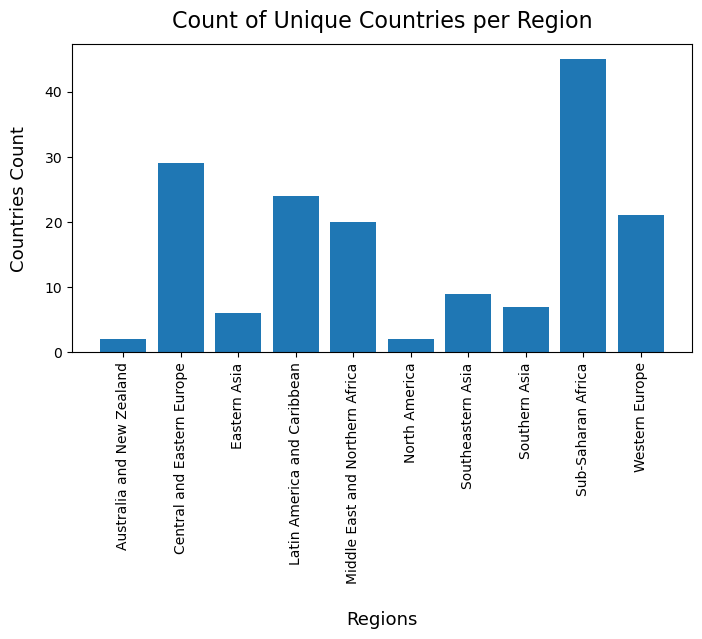

In [196]:
# Bar chart for the count of unique contries per region

plt.figure(figsize=(8,4))
plt.bar(countries_per_region['region'],countries_per_region['country'] )
plt.title("Count of Unique Countries per Region", fontsize = 16, pad = 12)
plt.ylabel('Countries Count',labelpad= 12, fontsize = 13)
plt.xlabel('Regions', labelpad = 20, fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

In [197]:
# Pivot table with rows as years and regions on column

pivot_table = df_combined.pivot_table(
    
    index = 'year',
    columns = 'region',
    values = 'country',
    aggfunc = 'count',
    fill_value = 0
)

In [198]:
pivot_table

region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,
2015,2,29,6,22,20,2,9,7,40,21
2016,2,29,6,24,19,2,9,7,38,21
2017,2,29,6,22,19,2,8,7,39,21
2018,2,29,6,21,19,2,9,7,39,20
2019,2,29,6,21,19,2,9,7,40,21


<Figure size 1200x800 with 0 Axes>

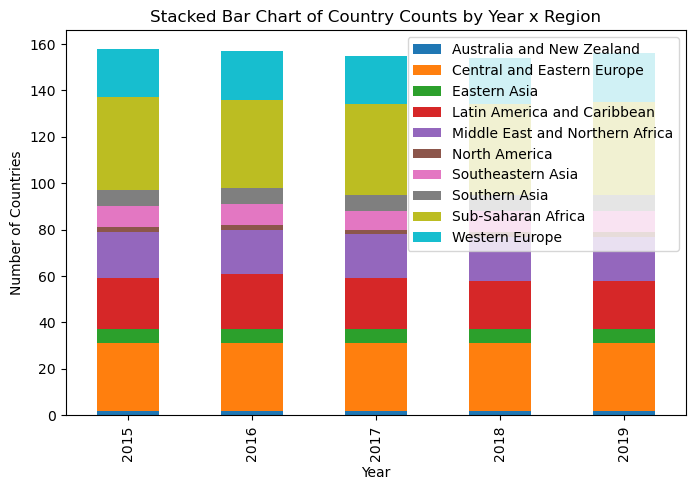

In [199]:
# stacked bar of counts by year × region.

plt.figure(figsize = (12,8))
pivot_table.plot(kind = 'bar', stacked = True, figsize = (8,5) )
plt.title("Stacked Bar Chart of Country Counts by Year x Region")
plt.ylabel('Number of Countries')
plt.xlabel('Year')
plt.legend(loc = 'upper right')
plt.show()

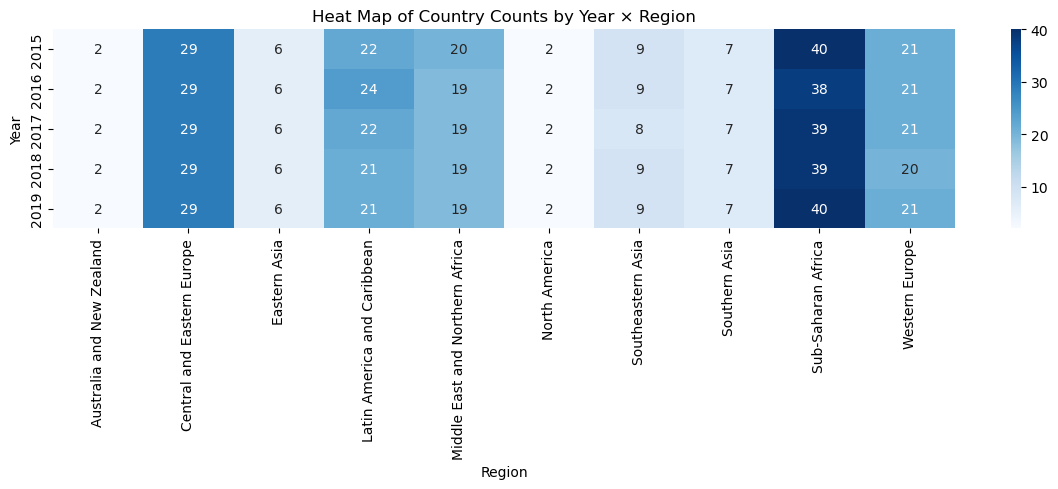

In [200]:
# Heat map of county counts be year x region

plt.figure(figsize=(12,5))
sns.heatmap(pivot_table,annot=True, cmap = 'Blues')
plt.title("Heat Map of Country Counts by Year × Region")
plt.xlabel("Region")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


summary
- The heat map shows how many countries are present in each region for each year (2015–2019).
- Central and Eastern Europe consistently has 29 countries every year, the highest count.
- Sub-Saharan Africa also shows very high counts (38–40) across all years.
- Latin America and Caribbean, Middle East and Northern Africa, and Eastern Asia show moderate counts (around 19–24).
- Most regions maintain nearly identical counts each year.

### 3. Trend Analysis of Happiness Score

**Analyze trends 2015–2019 for the top 5 happiest countries each year.**

In [204]:
# group by year and country on happiness
happiness_ = df_combined.groupby(['year','country'],as_index = False)['happiness_score'].sum()

In [205]:
#sort the top 5
happiness_sort = happiness_ .sort_values(by = 'happiness_score', ascending = False)
happiness_top5 = happiness_sort.head(5)
happiness_top5 = happiness_top5.sort_values(by = 'year', ascending = True)
happiness_top5

,year,country,happiness_score
135,2015,Switzerland,7.587
514,2018,Finland,7.632
574,2018,Norway,7.594
667,2019,Finland,7.769
660,2019,Denmark,7.600


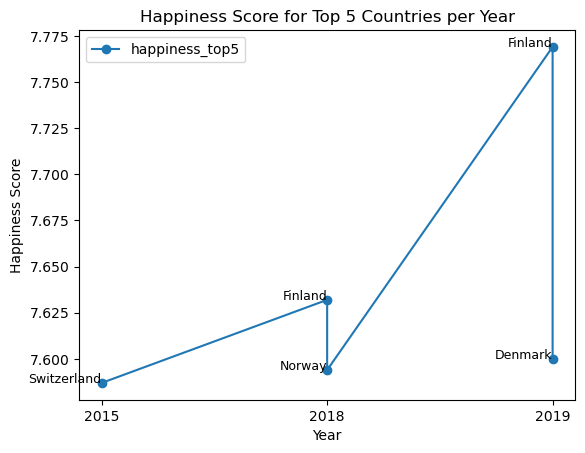

In [206]:
# Line plot showing happiness score trends(2015-2019)

plt.plot(happiness_top5['year'],happiness_top5['happiness_score'], marker = 'o', label = 'happiness_top5' )

# Annotaing the country at each marker point

for i, row in happiness_top5.iterrows():
    plt.text(row['year'], row['happiness_score'], row['country'], fontsize=9, ha='right')

plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score for Top 5 Countries per Year")
plt.legend()
plt.show() 

### 4. Correlation Analysis

**Compute correlations and interpret.**

In [209]:
# Correlation matrix (pearson)

In [210]:
#filter the numerical columns

num_cols = df_combined.select_dtypes(include = ['int64', 'float64']).columns.tolist()

In [211]:
num_cols

['happiness_rank',
 'happiness_score',
 'standard_error',
 'economy_gdp_per_capita',
 'family',
 'health_life_expectancy',
 'freedom',
 'trust_government_corruption',
 'generosity',
 'dystopia_residual',
 'lower_confidence_interval',
 'upper_confidence_interval']

In [212]:
# Index for getting all the the
index = [1,3,4,6,5,8,7]

In [213]:
# Extracting the columns for the correlation matrix
corr_list = [num_cols[col] for col in index]
corr_list

['happiness_score',
 'economy_gdp_per_capita',
 'family',
 'freedom',
 'health_life_expectancy',
 'generosity',
 'trust_government_corruption']

In [214]:
# Corr matrix table
corr_matrix = df_combined[corr_list].corr()
corr_matrix

,happiness_score,economy_gdp_per_capita,family,freedom,health_life_expectancy,generosity,trust_government_corruption
happiness_score,1.000000,0.789120,0.648436,0.550735,0.743039,0.138189,0.399666
economy_gdp_per_capita,0.789120,1.000000,0.585442,0.339501,0.784668,-0.013878,0.307469
family,0.648436,0.585442,1.000000,0.419208,0.573523,-0.036515,0.128113
freedom,0.550735,0.339501,0.419208,1.000000,0.340808,0.291788,0.461537
health_life_expectancy,0.743039,0.784668,0.573523,0.340808,1.000000,0.011049,0.250258
generosity,0.138189,-0.013878,-0.036515,0.291788,0.011049,1.000000,0.318803
trust_government_corruption,0.399666,0.307469,0.128113,0.461537,0.250258,0.318803,1.000000


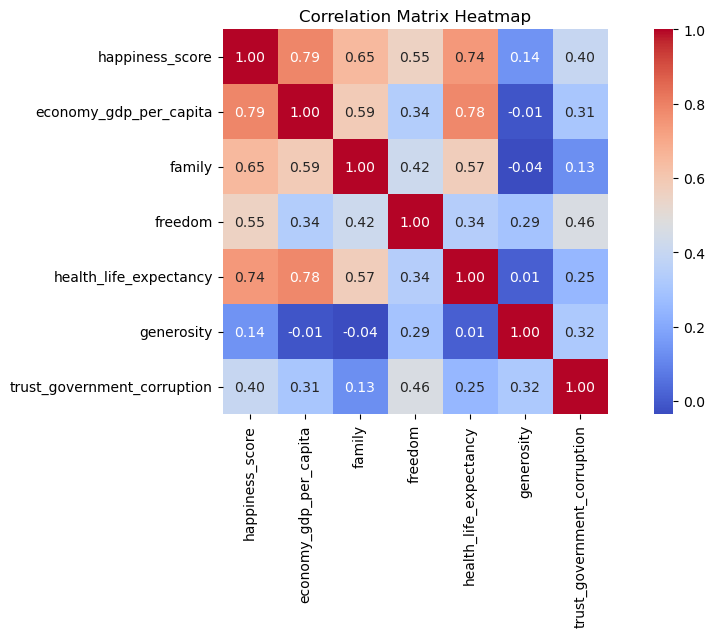

In [215]:
# Plotting the correlation matrix
plt.figure(figsize = (12,5))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", square = True)
plt.title("Correlation Matrix Heatmap")
plt.show()

- health_life_expectancy and economy_gdp_per_capita have a strong (positive) correlation with happiness_score at 0.74 and 0.79 respectively.
- While generosity has the lowest correlation with happiness_score.

### 5. Build a Regression Model

**Predict `happiness_score` using the listed predictors.**

Predictors: `gdp_per_capita`, `social_support`, `healthy_life_expectancy` (or `health`), `freedom`, `generosity`, `perceptions_of_corruption` (or `corruption`).

In [219]:
# Importing the libraries needed for regression
from sklearn.model_selection import train_test_split

In [220]:
# Separate data into features and target
cols_needed = df_combined[[ 'happiness_score',
 'economy_gdp_per_capita',
 'family',
 'freedom',
 'health_life_expectancy',
 'generosity',
 'trust_government_corruption']]

In [221]:
# checking for missing values in the predictors and target columns

cols_needed.isna().sum()

happiness_score                0
economy_gdp_per_capita         0
family                         0
freedom                        0
health_life_expectancy         0
generosity                     0
trust_government_corruption    1
dtype: int64

In [222]:
# drop the missing row
clean_cols = cols_needed.dropna(subset = ['trust_government_corruption'])
clean_cols.isna().sum()

happiness_score                0
economy_gdp_per_capita         0
family                         0
freedom                        0
health_life_expectancy         0
generosity                     0
trust_government_corruption    0
dtype: int64

In [223]:
# splitting into predictors and target column

y = clean_cols['happiness_score']
x = clean_cols[[ 
 'economy_gdp_per_capita',
 'family',
 'freedom',
 'health_life_expectancy',
 'generosity',
 'trust_government_corruption']]

In [224]:
# Split into training and test (80 : 20 respectively)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 10)

In [225]:
x_train.shape, x_test.shape 

((623, 6), (156, 6))

In [226]:
# Create the regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [227]:
# fitting into the model

model.fit(x_train, y_train)

LinearRegression()

In [228]:
# predicting
y_pred = model.predict(x_train)

In [229]:
y_train

572    4.724
523    5.891
437    4.292
323    7.284
264    4.793
       ...  
369    5.838
320    7.377
528    5.762
125    4.369
265    4.754
Name: happiness_score, Length: 623, dtype: float64

In [230]:
# Model coefficients with mapped variable names

model_coeff = pd.DataFrame()
model_coeff['variable_name'] = x.columns
model_coeff['coefficient'] = model.coef_

In [231]:
model_coeff.sort_values(by = 'coefficient', ascending = False)

,variable_name,coefficient
2,freedom,1.457298
0,economy_gdp_per_capita,1.060732
3,health_life_expectancy,1.049609
5,trust_government_corruption,1.029258
1,family,0.691287
4,generosity,0.583152


In [232]:
# Model evaluation
from sklearn.metrics import r2_score

In [233]:
r2_score(y_train, y_pred)

0.7597904523473095

- The coefficient of determination of the model is 75.9%.
- The model explain 75.9% of the variance in the target column.
- The model fits well with the data.

### 6. Regional Comparison

**Analyze regional average happiness per year**

In [237]:
# Average happiness score by region and year

region_avg = df_combined.groupby(['year','region'], as_index = False)['happiness_score'].mean()
region_avg

,year,region,happiness_score
0,2015,Australia and New Zealand,7.285000
1,2015,Central and Eastern Europe,5.332931
2,2015,Eastern Asia,5.626167
3,2015,Latin America and Caribbean,6.144682
4,2015,Middle East and Northern Africa,5.406900
5,2015,North America,7.273000
6,2015,Southeastern Asia,5.317444
7,2015,Southern Asia,4.580857
8,2015,Sub-Saharan Africa,4.202800
9,2015,Western Europe,6.689619


In [238]:
# Pivot table, so each region will be a column

region_piv = region_avg.pivot(
    index = 'year',
    columns = 'region',
    values = 'happiness_score'
)

In [239]:
region_piv

region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,
2015,7.2850,5.332931,5.626167,6.144682,5.406900,7.2730,5.317444,4.580857,4.202800,6.689619
2016,7.3235,5.370690,5.624167,6.101750,5.386053,7.2540,5.338889,4.563286,4.136421,6.685667
2017,7.2990,5.409931,5.646667,5.957818,5.369684,7.1545,5.444875,4.628429,4.111949,6.703714
2018,7.2980,5.463966,5.672000,5.938619,5.282737,7.1070,5.313444,4.603857,4.195026,6.829100
2019,7.2675,5.561517,5.688833,5.954429,5.237000,7.0850,5.273667,4.526857,4.300050,6.842190


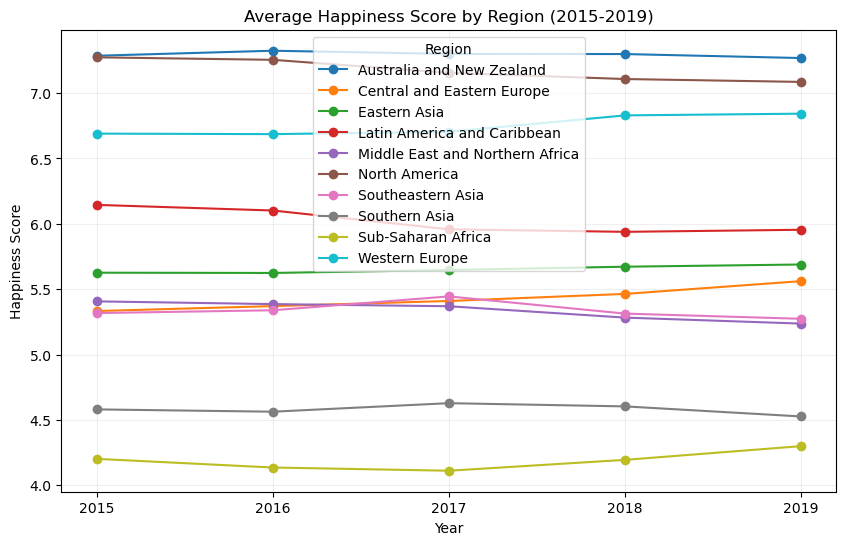

In [240]:
# Plotting the region pivot table
plt.figure(figsize=(10,6))

for region in region_piv.columns:
    plt.plot(region_piv.index, region_piv[region], marker='o', label=region)

plt.title("Average Happiness Score by Region (2015-2019)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.xticks(region_piv.index) 
plt.legend(title="Region")
plt.grid(True, alpha = 0.2)
plt.show()

- North America, Latin America and carribean, Southern Asia has seen a sharp decline in happiness score over the period.
- There's a noticeable improvement for subsaharan africa from 2017.
- Eastern Asia has not seen a difference through out the years. (constant happiness score).
- Western Europe has seen a consistent improvement in happiness score.

### 7. Identify Key Drivers of Happiness (Ranking)

**Rank predictor variables by importance.**


In [244]:
# previewing predictors
predictors = x
predictors

,economy_gdp_per_capita,family,freedom,health_life_expectancy,generosity,trust_government_corruption
0,1.39651,1.34951,0.66557,0.94143,0.29678,0.41978
1,1.30232,1.40223,0.62877,0.94784,0.43630,0.14145
2,1.32548,1.36058,0.64938,0.87464,0.34139,0.48357
3,1.45900,1.33095,0.66973,0.88521,0.34699,0.36503
4,1.32629,1.32261,0.63297,0.90563,0.45811,0.32957
...,...,...,...,...,...,...
775,0.35900,0.71100,0.55500,0.61400,0.21700,0.41100
776,0.47600,0.88500,0.41700,0.49900,0.27600,0.14700
777,0.35000,0.51700,0.00000,0.36100,0.15800,0.02500
778,0.02600,0.00000,0.22500,0.10500,0.23500,0.03500


In [245]:
#correlation for each predictor with happiness_score
happiness = y
corr_with_happiness = predictors.corrwith(happiness).sort_values(ascending = False)
corr_with_happiness

economy_gdp_per_capita         0.789555
health_life_expectancy         0.743426
family                         0.650884
freedom                        0.552842
trust_government_corruption    0.399666
generosity                     0.138757
dtype: float64

In [246]:
# absolute correlation. All values are +ve, so we will have thesame results.
corr_ranking = corr_with_happiness.abs().sort_values(ascending=False)

In [247]:
corr_ranking

economy_gdp_per_capita         0.789555
health_life_expectancy         0.743426
family                         0.650884
freedom                        0.552842
trust_government_corruption    0.399666
generosity                     0.138757
dtype: float64

- The absolute correlation measures the linear relationship between a single predictor (while ignoring the others) and the target column.
- It does not account for interactions between other predictors.
- economy_gdp_per_capita and health_life_expectancy each have a high absolute correlation with happiness. 

In [249]:
# model coeff of variables from earlier
model_coeff

,variable_name,coefficient
0,economy_gdp_per_capita,1.060732
1,family,0.691287
2,freedom,1.457298
3,health_life_expectancy,1.049609
4,generosity,0.583152
5,trust_government_corruption,1.029258


- The model based coefficient magnitude measures the effect of each predictor.

**Compare rankings across years (e.g., show top 3 drivers per year)**

In [252]:
# Top 3 drivers of happiness based on absolute correlation

corr_ranking # This shows us the absolute correlation across all years

economy_gdp_per_capita         0.789555
health_life_expectancy         0.743426
family                         0.650884
freedom                        0.552842
trust_government_corruption    0.399666
generosity                     0.138757
dtype: float64

### 8. Country-Level Case Study

**Pick one country (e.g., Finland or Denmark) and analyze year-by-year changes.**

In [255]:
# filter the rows containing norway under country
norway_df = df_combined[df_combined['country'] == 'Norway'].sort_values('year')

In [256]:
norway_df

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year,lower_confidence_interval,upper_confidence_interval
3,Norway,Western Europe,4,7.522,0.0388,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,WES,2015,NaN,NaN
161,Norway,Western Europe,4,7.498,NaN,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950,2.664650,WES,2016,7.421000,7.575000
315,Norway,Western Europe,1,7.537,NaN,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,WES,2017,7.479556,7.594445
471,Norway,Western Europe,2,7.594,NaN,1.456000,1.582000,0.861000,0.686000,0.340000,0.286000,NaN,WES,2018,NaN,NaN
626,Norway,Western Europe,3,7.554,NaN,1.488000,1.582000,1.028000,0.603000,0.341000,0.271000,NaN,WES,2019,NaN,NaN


In [257]:
pred_cols = predictors.columns

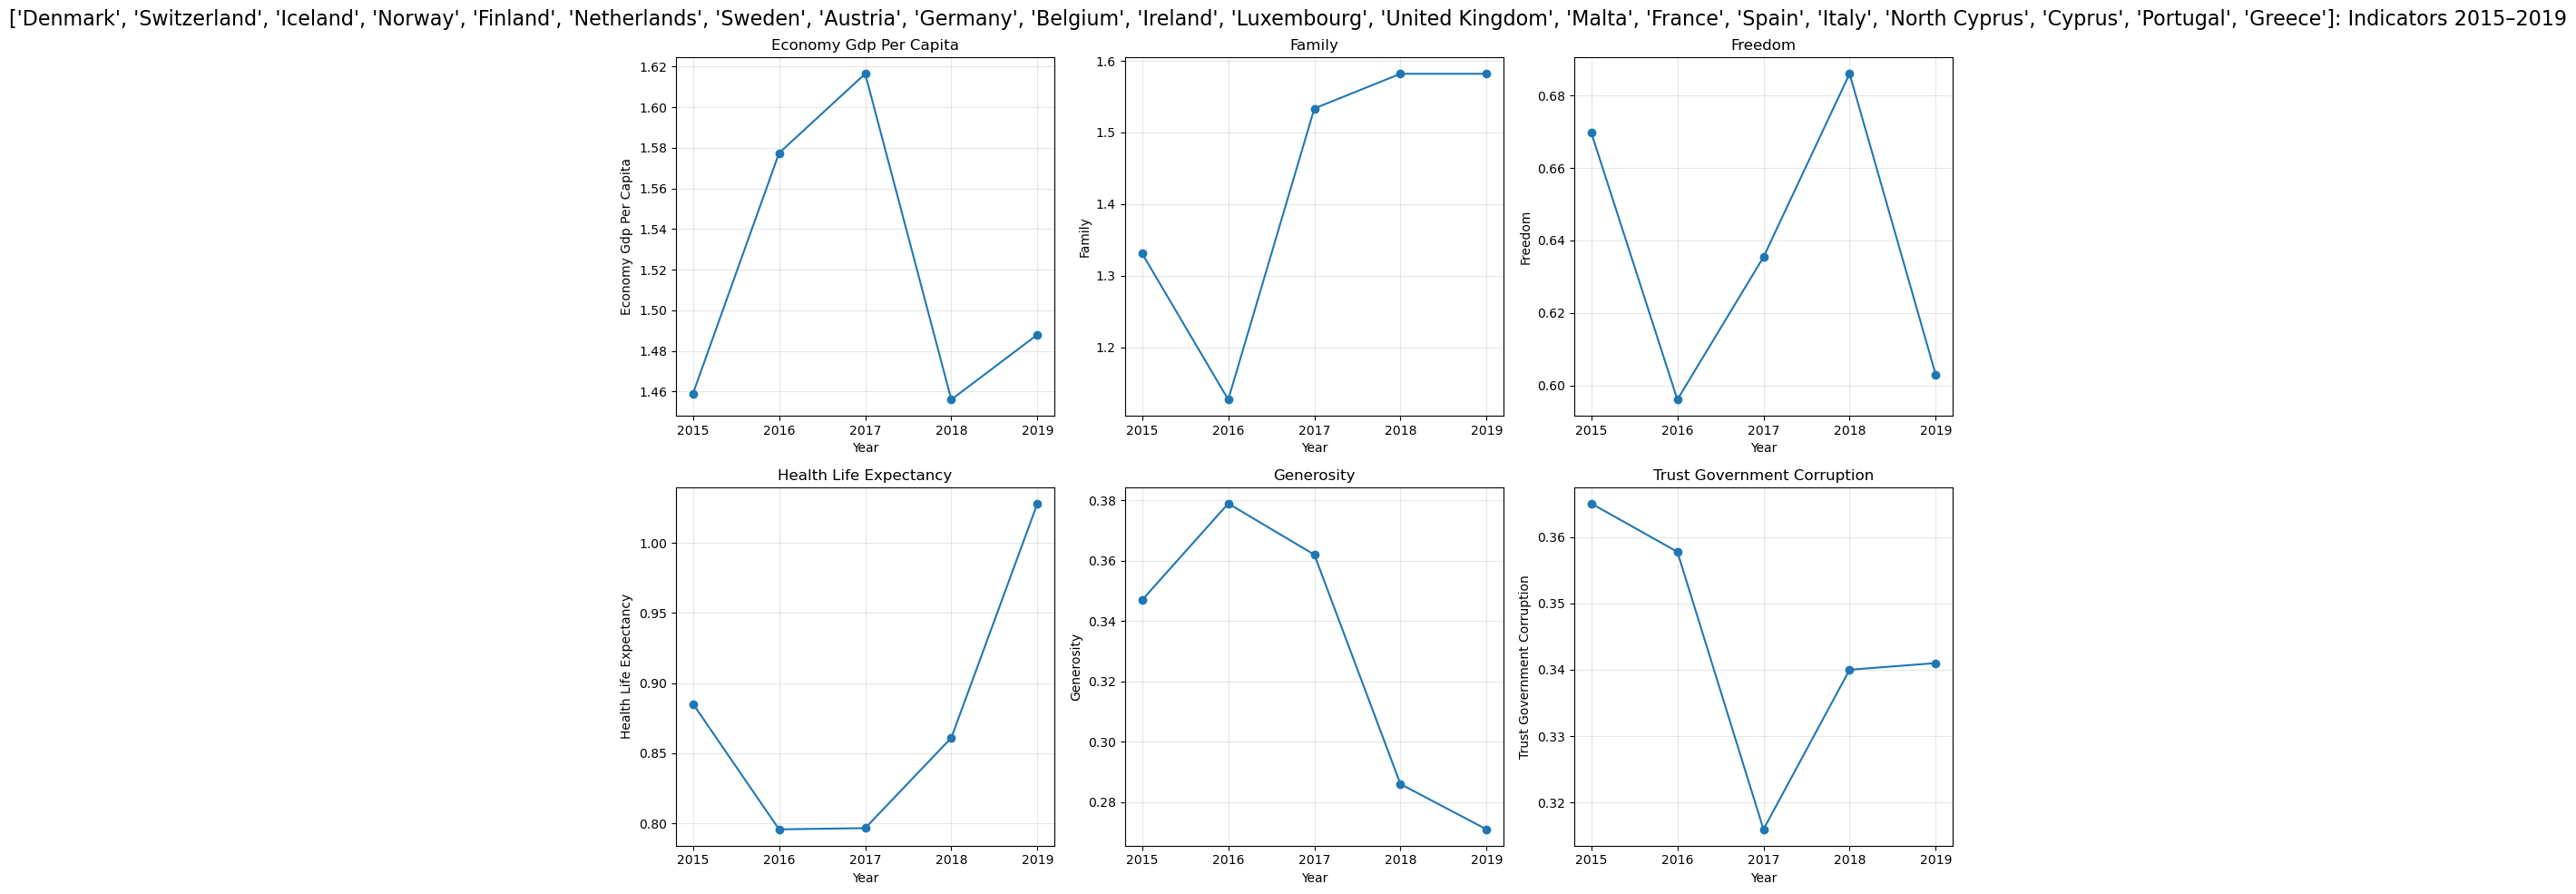

In [258]:
# Plotting all the predictors for Norway
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, indicator in enumerate(pred_cols):
    ax = axes[i]               
    ax.plot(norway_df['year'], norway_df[indicator], marker='o')
    ax.set_title(indicator.replace('_', ' ').title())
    ax.set_xlabel("Year")
    ax.set_ylabel(indicator.replace('_', ' ').title())
    ax.grid(True, alpha=0.3)

for j in range(i+1, len(axes)):
    axes[j].axis('off')
    
fig.suptitle(f"{country}: Indicators 2015–2019", fontsize=16)
plt.tight_layout()
plt.show()

- Health life expectancy and family support has seen a consistent growth throughout the period.
- Generosity has seen a sharp drop.
- Gdp per capital had a strong uptrend from 2015 to 2017, but experienced a sharp decline between 2017 and 2018.

### 9. Detect Outliers

Identify countries with:
- unusually **high GDP but low happiness**.
- unusually **high happiness but low GDP**.

Using use quartiles (Q1 and Q3) :
- High GDP: GDP per capita > Q3
- LOW GDP : GDP per capita < Q1
- High happiness : happiness score > Q3
- Low happiness : happiness score < Q1

In [263]:
# Calculating the quartiles for gdp_per_capita and happiness_score

gdp_per_capita_q1 = df_combined['economy_gdp_per_capita'].quantile(0.25)
gdp_per_capita_q3 = df_combined['economy_gdp_per_capita'].quantile(0.75)
happiness_score_q1 = df_combined['happiness_score'].quantile(0.25)
happiness_score_q3 = df_combined['happiness_score'].quantile(0.75)

In [264]:
gdp_per_capita_q1, gdp_per_capita_q3 , happiness_score_q1 , happiness_score_q3

(0.6045122301578523, 1.23725, 4.50875, 6.1845)

In [265]:
# high GDP but low happiness
high_gdp_but_low_happiness = df_combined[
            (df_combined['economy_gdp_per_capita'] > gdp_per_capita_q3) &
            (df_combined['happiness_score'] <happiness_score_q1)
]

In [266]:
high_gdp_but_low_happiness

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year,lower_confidence_interval,upper_confidence_interval


In [267]:
# high happiness but low GDP
high_happiness_but_low_gdp = df_combined[
            (df_combined['economy_gdp_per_capita'] < gdp_per_capita_q1) &
            (df_combined['happiness_score'] > happiness_score_q3)
]

In [268]:
high_happiness_but_low_gdp

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,region_code,year,lower_confidence_interval,upper_confidence_interval


It seems that no country fall under the conditions. Therefore, we do not have outliers.

### 10. Create a Final Combined Dashboard/Table

**Top 5 happiest countries (with scores)**

In [272]:
# sort the countries by ascending year and descending happiness score
top_countries = df_combined.sort_values(['year','happiness_score'], ascending = [True, False])

In [273]:
# groupby year to get the top5 countries per year
top5 = top_countries.groupby('year')[['year','country','happiness_score']].head(5)
top5

,year,country,happiness_score
0,2015,Switzerland,7.587
1,2015,Iceland,7.561
2,2015,Denmark,7.527
3,2015,Norway,7.522
4,2015,Canada,7.427
158,2016,Denmark,7.526
159,2016,Switzerland,7.509
160,2016,Iceland,7.501
161,2016,Norway,7.498
162,2016,Finland,7.413


**Bottom 5 happiest countries (with scores)**

In [275]:
# sort the countries by ascending year and ascending  happiness score
bottom_countries = df_combined.sort_values(['year','happiness_score'], ascending = [True, True])

In [276]:
# groupby year to get the bottom5 countries per year
bottom5 = bottom_countries.groupby('year')[['year','country','happiness_score']].head(5)
bottom5

,year,country,happiness_score
157,2015,Togo,2.839
156,2015,Burundi,2.905
155,2015,Syria,3.006
154,2015,Benin,3.340
153,2015,Rwanda,3.465
314,2016,Burundi,2.905
313,2016,Syria,3.069
312,2016,Togo,3.303
311,2016,Afghanistan,3.360
310,2016,Benin,3.484


**Regional averages (mean happiness per region)**

In [278]:
# groupby year and region on happiness_score to get the mean

regional_avg = df_combined.groupby(['year', 'region'], as_index = False)['happiness_score'].mean()
regional_avg

,year,region,happiness_score
0,2015,Australia and New Zealand,7.285000
1,2015,Central and Eastern Europe,5.332931
2,2015,Eastern Asia,5.626167
3,2015,Latin America and Caribbean,6.144682
4,2015,Middle East and Northern Africa,5.406900
5,2015,North America,7.273000
6,2015,Southeastern Asia,5.317444
7,2015,Southern Asia,4.580857
8,2015,Sub-Saharan Africa,4.202800
9,2015,Western Europe,6.689619


**Overall trend of Happiness score**

In [280]:
global_trend = df_combined.groupby('year', as_index=False)['happiness_score'].mean()
global_trend

,year,happiness_score
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.367636
4,2019,5.407096


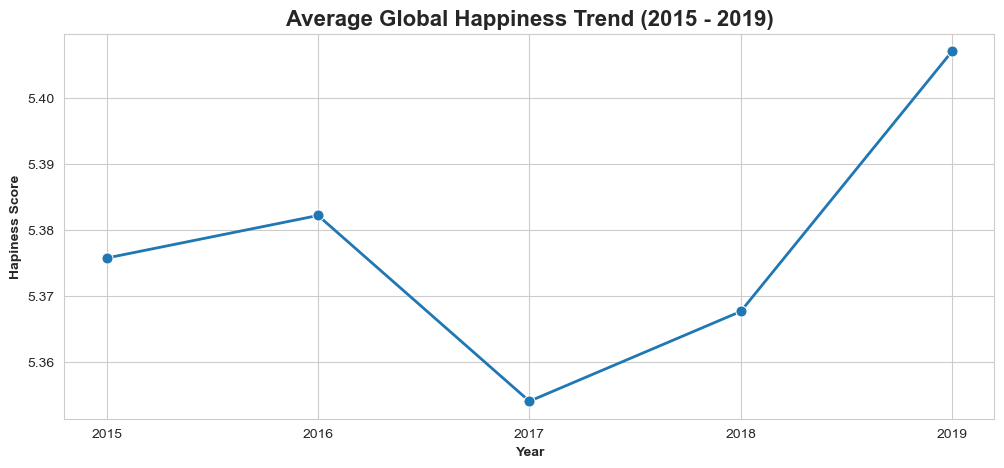

In [281]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')

sns.lineplot(data=global_trend, x='year', y='happiness_score', marker='o', linewidth=2, markersize=8)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Hapiness Score', fontweight='bold')
plt.title('Average Global Happiness Trend (2015 - 2019)', fontweight='bold', fontsize=16)
plt.show()

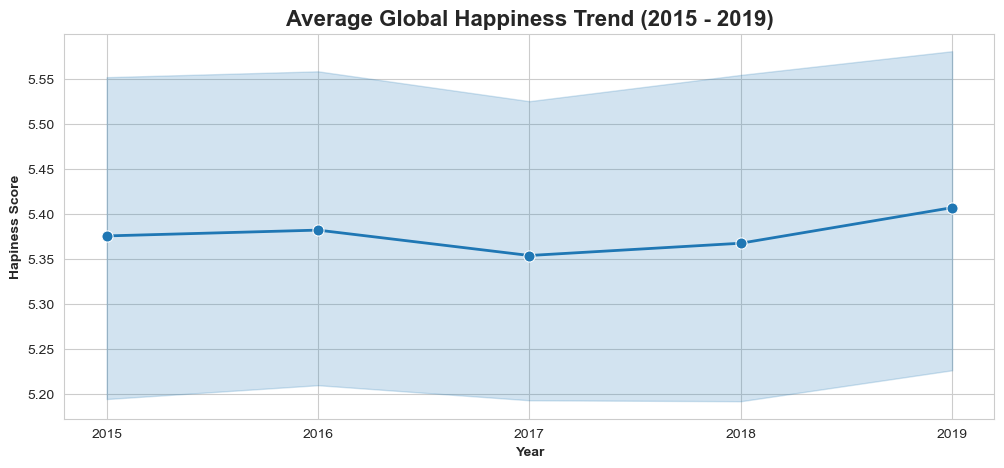

In [282]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')

sns.lineplot(data=df_combined, x='year', y='happiness_score', marker='o', linewidth=2, markersize=8)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Hapiness Score', fontweight='bold')
plt.title('Average Global Happiness Trend (2015 - 2019)', fontweight='bold', fontsize=16)
plt.show()

## Part C - FINAL DELIVERABLE (INSIGHT REPORT)

**1. INTRODUCTION**

We analyzed the World Happiness Report with data from 2015 - 2019. Our aim is to understand what are the drivers of national happiness. How does happiness compare across different regions, and how does the global happiness trend.

The primary questions we answered are:
- What factors or predictors strongly influence a country's happiness score?
- Regions that are performing well or poorly. How does the trend changed over time?
- Which countries are doing well and which are doing poorly?
- Do we have similar pattern in the data or are there outliers?


**2. METHODS**

**2.1 Data Cleaning**

- Column Renaming : We started by renaming the columns for clarity and consistency across all the datasets.
- Region Handling/Mapping : Some of the data sets do not have regions, so we assigned each country to a consistent regional group.
- Handling Missing Values : We removed missing values that are lower than 5% ; only for columns that we used for the regression model. A year column was introduced to all the datasets to distinguished them.
- Final Merge : The next step is to unify the datasets into a single dataframe.

**2.2 Analysis Methods**

- Exploatory analysis : EDA was performed to sumarize describtive statistics, comparism across years, and region-level mean values.
- Correlation Analysis : We examined relationships between happiness and predictors. Checked for high and low correlation predictors.
- Regression Modelling : A linear regression was fitted. The R^2 score = 0.76, meaning the model explains 76% of varition of coefficients in happiness scores.
- Visualizations : We used heatmaps, line charts, bar charts for reports.7
- Outlier Detection : We used inter quartile range (Q1 - Q3 thresholds) for GDP and happiness to detect extreme outliers.


**3. KEY INSIGHTS**

**3.1 Top Drivers of Happiness**

The regression results shows that freedom has the strongest driver of happiness while generosity is the weakest.
- freedom ------- > strongest driver
- gdp
- health
- corruption
- family
- generosity ---------- > weakest driver

Countries with high freedom , strong gpd, and high life expectancy consistently achieve higher happiness levels.


**3.2 Regional Winners and Losers (2015 - 2019)**

From the regional averages:
- Western Europe, North America, Australia and New Zealand consistently top the ranking scores.
- Sub-Saharan Africa and South Asia remains the lowest scoring regions.
- Southern Europe shows an improvement in happiness score.
- Latin America and the Carribean maintains mid happiness levels.

**3.3 How Global Happiness Changed (2015 - 2019)**

The Mean Global happiness levels remained relatively stable, with minor fluctuations. Some regions (e.g Western Europe) saw slight increases, while others like Sub-Saharan Africa remain low. There are no evidence of major global decline over this period.


**3.4 Outliers and Anomalies**

We used Q1 - Q3 thresholds for GDP and happiness. Values above Q3 or below Q1 are treated as outliers.
- No countries showed "high GPD but low happiness" or "low GDP but high happines" based on the IQR thresholds.
- This indicates that there's a consistent global pattern that happiness aligns with economic indicators.

**4. CONCLUSION AND RECOMMENDATIONS**

**4.1 Conclusion**

The regression model coefficients shows that freedom to make life choices is the strongest contributor to national happiness. Higer GPD per capita and high life expectancy are strong foundation for happiness. These reflects a country's ability to provide financial security , long and healthy life. Trust in government also plays an important role, when the citizens believe in public institutions to be fair and transparent, it rise the national happiness.


**4.2 Recommendations**

- Since freedom is the strongest driver, government policies should focus on empowering people to make meaningful decisons about their lives. People should have the freedom of expression.
- Government should focus on policies that improve ecomonic growth. E.g supporting small businesses, fair employment polices, improving education system.
- The health sector is an important department that shouldnt be ignored. Government should invest in affordable healthcare access, public health education, clean water and sanitation.
- Trust in goverment remains a major driver. In other to build trust , government should make spending more transparent and strenthen anti-corruption agencies.


**4.3 Action Priorities**

- Expand personal freedom and reduce barries to opportunity.
- Boost economic and fair income growth.
- Invest in affordable healthcare.
- Strengthen public trust and life expectancy.